# Закрепление материала по нечёткой логике

## Задание 1. Операции над нечёткими множествами


В данном разделе будет проведена работа по базовым операциям с нечёткими множествами, основой для работы с нечёткой логикой.



In [1]:
# Подключение библиотек
from matplotlib import pyplot as plt
from enum import Enum
import numpy as np

Лингвистическая переменная -- *Симпатия*.

Список терм:
- Ужасный,
- Невзрачный,
- Нормальный,
- Милый,
- Привлекательный

In [2]:
class Liking(Enum):
    UGLY = -100
    PLAIN = -50
    NORMAL = 0
    CUTE = 50
    ATTRACTIVE = 100


liking_range = [-100, 100]
liking_min = liking_range[0]
liking_range_num = liking_range[1] - liking_range[0] + 1

Оценка будет проведена по целому значению от -100 до 100

Основными факторами увеличения или уменьшения симпатии будут:
- одежда
- внешность
- навыки общения
- синергия между разными элементами

Каждая будет вносить свой вклад в развитие уровня симпатии.

In [3]:
def get_expert_opinion(ugly, plain, normal, cute, attractive):
    return {
        Liking.UGLY: ugly,
        Liking.PLAIN: plain,
        Liking.NORMAL: normal,
        Liking.CUTE: cute,
        Liking.ATTRACTIVE: attractive
    }

In [4]:
# Экспертные мнения
expert1 = get_expert_opinion(
    [-100, -30],
    [-50, -10],
    [-12, 37],
    [20, 70],
    [60, 100])

expert2 = get_expert_opinion(
    [-100, -60],
    [-70, -40],
    [-50, 50],
    [30, 60],
    [40, 100])

expert3 = get_expert_opinion(
    [-100, 0],
    [-50, 50],
    [-25, 75],
    [50, 100],
    [75, 100])

expert4 = get_expert_opinion(
    [-100, -30],
    [-40, 50],
    [-100, 100],
    [20, 80],
    [25, 100])

experts_array = [expert1, expert2, expert3, expert4]

In [5]:
ugly_values = np.zeros(liking_range_num)
plain_values = np.zeros(liking_range_num)
normal_values = np.zeros(liking_range_num)
cute_values = np.zeros(liking_range_num)
attractive_values = np.zeros(liking_range_num)

In [6]:
def increament_values(arr_values, index_range):
    index_range = np.array(index_range)
    index_range -= liking_min
    arr_values[index_range[0]:index_range[1]+1] += 1


for expert in experts_array:
    increament_values(ugly_values, expert[Liking.UGLY])
    increament_values(plain_values, expert[Liking.PLAIN])
    increament_values(normal_values, expert[Liking.NORMAL])
    increament_values(cute_values, expert[Liking.CUTE])
    increament_values(attractive_values, expert[Liking.ATTRACTIVE])

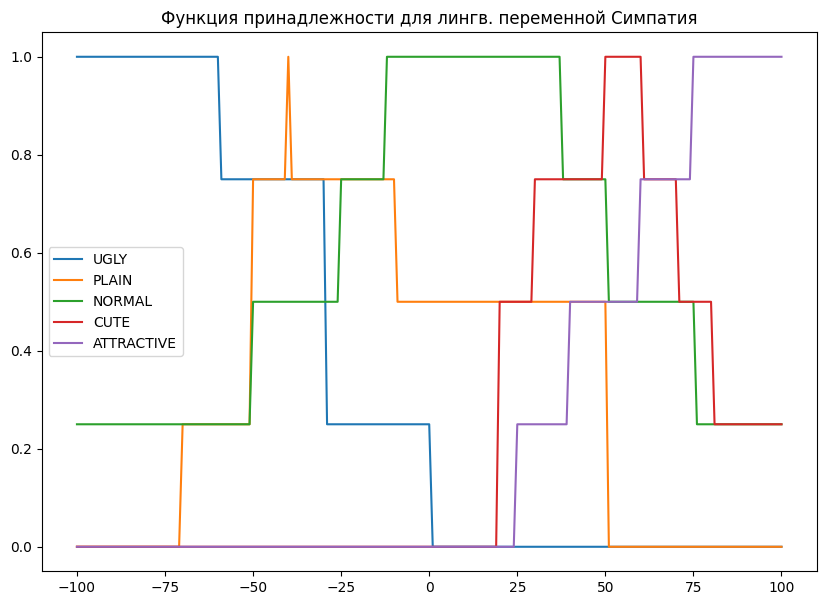

In [7]:
x_values = np.arange(liking_range[0], liking_range[1]+1)
values = [ugly_values, plain_values, normal_values, cute_values, attractive_values]
labels = [Liking.UGLY.name, Liking.PLAIN.name, Liking.NORMAL.name, Liking.CUTE.name, Liking.ATTRACTIVE.name]

plt.figure(figsize=(10, 7))
for i, vals in enumerate(values):
    vals /= len(experts_array)
    plt.plot(x_values, vals, label = labels[i])

plt.title("Функция принадлежности для лингв. переменной Симпатия")
plt.legend()
plt.show()

Следующим пунктом будут операции над множествами.
Уже существуют 5 множеств, которые отражают конкретную терму, но этим можно не ограничиваться.
Можно создавать более сложные множества для разные целей, и для этого существуют операции над ними.

In [8]:
# равенство множеств
awful_values = ugly_values.copy()
print("Awful == Ugly: ", np.all(awful_values == ugly_values))

Awful == Ugly:  True


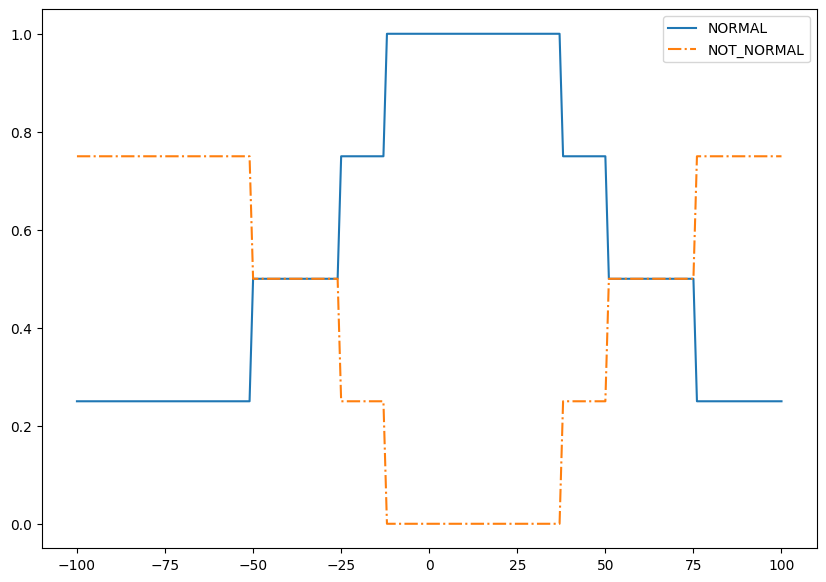

In [9]:
# дополнение
not_normal_values = 1 - normal_values.copy()

plt.figure(figsize=(10,7))
plt.plot(x_values, normal_values, label="NORMAL")
plt.plot(x_values, not_normal_values, label="NOT_NORMAL", linestyle="dashdot")

plt.legend()
plt.show()

In [10]:
# операция дизъюнкции
def disjunction_max(a, b):
    return np.maximum(a, b)


def disjunction_prob(a, b):
    return np.array(list(map(lambda z: z[0] + z[1] - z[0] * z[1], zip(a, b))))

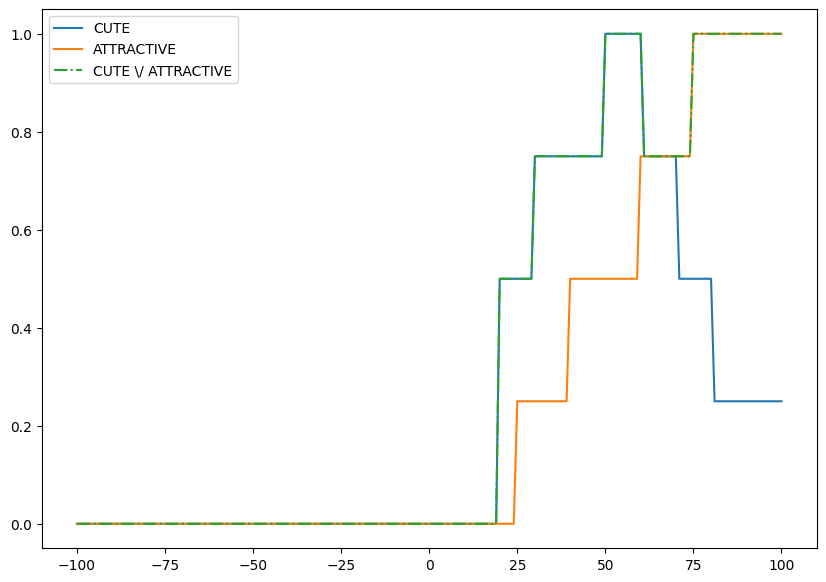

In [11]:
nice_values = disjunction_max(cute_values, attractive_values)

plt.figure(figsize=(10,7))
plt.plot(x_values, cute_values, label="CUTE")
plt.plot(x_values, attractive_values, label="ATTRACTIVE")
plt.plot(x_values, nice_values, label="CUTE \/ ATTRACTIVE", linestyle="dashdot")

plt.legend()
plt.show()

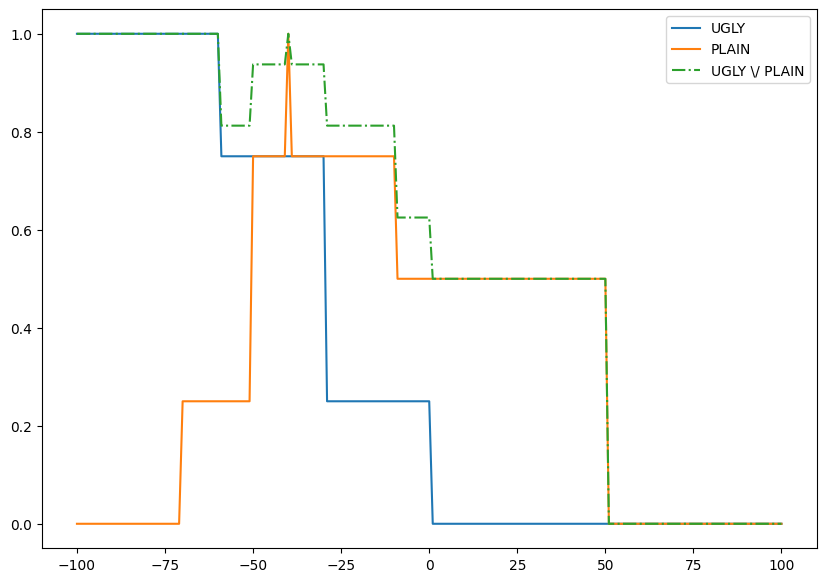

In [12]:
bad_values = disjunction_prob(ugly_values, plain_values)

plt.figure(figsize=(10,7))
plt.plot(x_values, ugly_values, label="UGLY")
plt.plot(x_values, plain_values, label="PLAIN")
plt.plot(x_values, bad_values, label="UGLY \/ PLAIN", linestyle="dashdot")

plt.legend()
plt.show()

In [13]:
# операция конъюнкции
def conjunction_max(a, b):
    return np.minimum(a, b)


def conjunction_prob(a, b):
    return np.array(list(map(lambda z: z[0] * z[1], zip(a, b))))

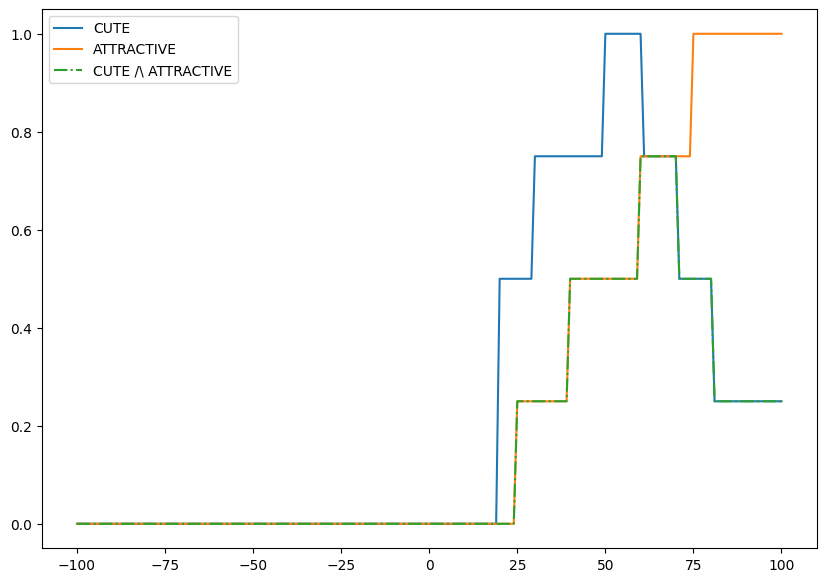

In [14]:
cutty_attr_values = conjunction_max(cute_values, attractive_values)

plt.figure(figsize=(10,7))
plt.plot(x_values, cute_values, label="CUTE")
plt.plot(x_values, attractive_values, label="ATTRACTIVE")
plt.plot(x_values, cutty_attr_values, label="CUTE /\ ATTRACTIVE", linestyle="dashdot")

plt.legend()
plt.show()

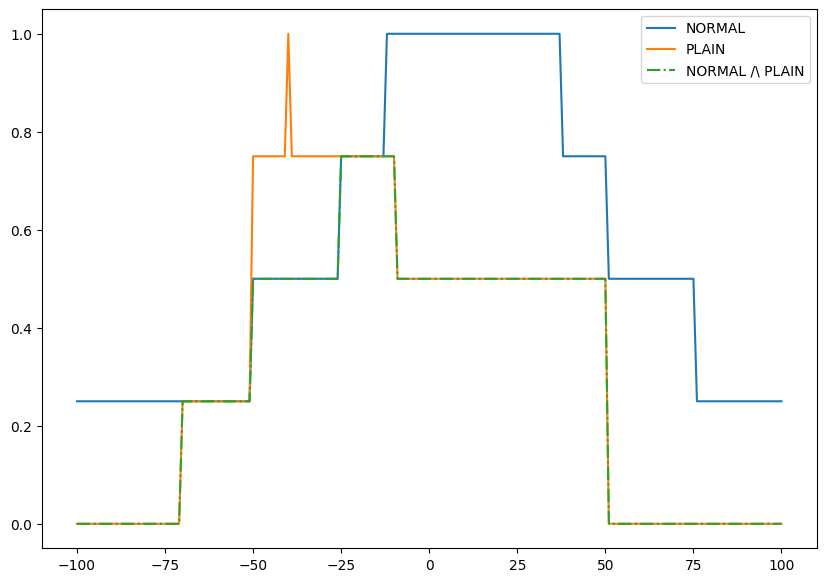

In [15]:
plain_normal_values = conjunction_max(normal_values, plain_values)

plt.figure(figsize=(10,7))
plt.plot(x_values, normal_values, label="NORMAL")
plt.plot(x_values, plain_values, label="PLAIN")
plt.plot(x_values, plain_normal_values, label="NORMAL /\ PLAIN", linestyle="dashdot")

plt.legend()
plt.show()

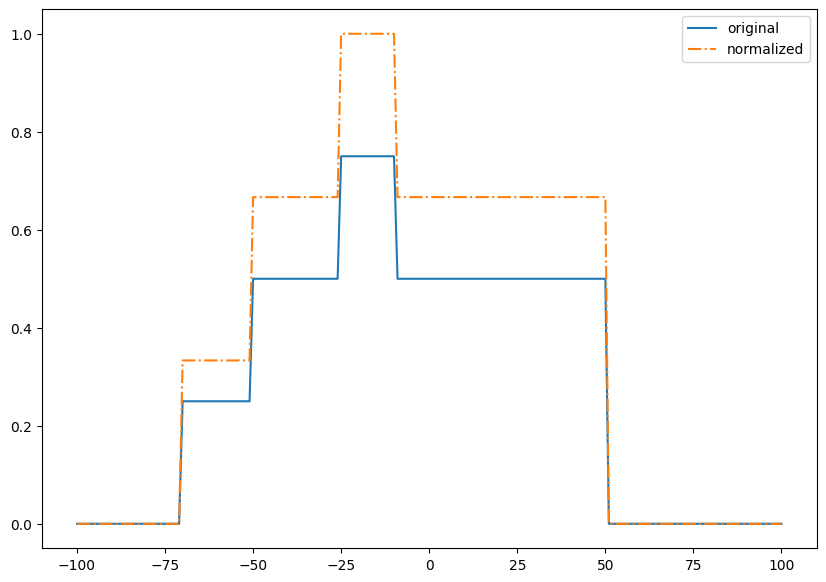

In [16]:
# нормализация
def normalize(a):
    return a / np.max(a)


plain_normal_normalized_values = normalize(plain_normal_values)

plt.figure(figsize=(10,7))
plt.plot(x_values, plain_normal_values, label="original")
plt.plot(x_values, plain_normal_normalized_values, label="normalized", linestyle="dashdot")

plt.legend()
plt.show()

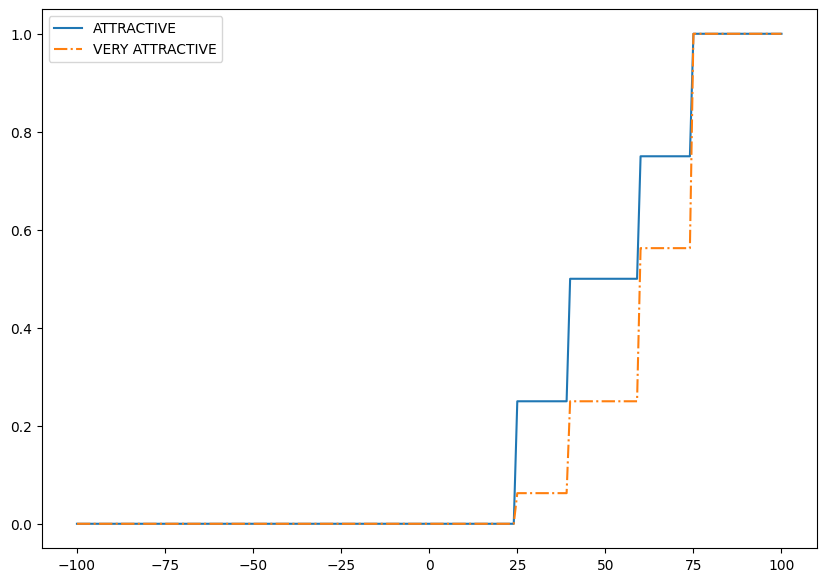

In [17]:
# модификатор ОЧЕНЬ
def very_modifier(a):
    return a ** 2


very_attractive_values = very_modifier(attractive_values)

plt.figure(figsize=(10,7))
plt.plot(x_values, attractive_values, label="ATTRACTIVE")
plt.plot(x_values, very_attractive_values, label="VERY ATTRACTIVE", linestyle="dashdot")

plt.legend()
plt.show()

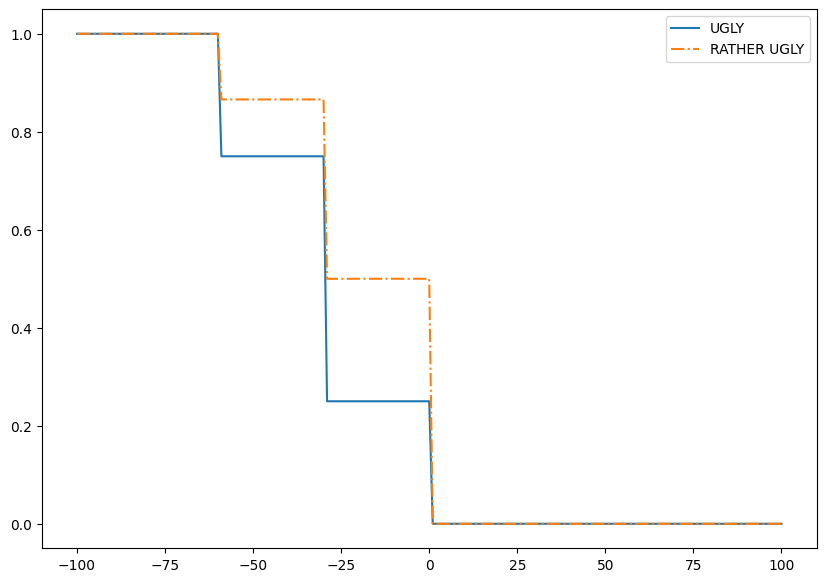

In [18]:
# модификатор НАВЕРНОЕ
def rather_modifier(a):
    return a ** 0.5


rather_ugly_values = rather_modifier(ugly_values)

plt.figure(figsize=(10,7))
plt.plot(x_values, ugly_values, label="UGLY")
plt.plot(x_values, rather_ugly_values, label="RATHER UGLY", linestyle="dashdot")

plt.legend()
plt.show()

In [19]:
# операция принадлежности
def set_belongs_to(the_set, belongs_to):
    return np.all(the_set <= belongs_to)


print("VERY ATTRACTIVE in ATTRACTIVE: ", set_belongs_to(very_attractive_values, attractive_values))
print("RATHER UGLY in UGLY: ", set_belongs_to(rather_ugly_values, ugly_values))

VERY ATTRACTIVE in ATTRACTIVE:  True
RATHER UGLY in UGLY:  False


## Задание 2. Нечёткие отношения

Кроме взятия значений из функции принадлежности $F: U → [0, 1]$ можно также воспользоваться нечёткими отношениями.

Достаточно частый вариант для отношений, используемый в играх: эффективность против тех или иных героев как по отдельности, так и в каких-то группах, расчёт закупок для разных типов войск.

Также нечёткие отношения можно применять для полного перебора всех вариантов действий при тех или иных значениях переменных (например, здоровье, урон и расстояние). Для этого лучше использовать продукционную базу правил, так как количество вариантов станет слишком большим при увеличении переменных, но здесь ради примера воспользуемся именно нечёткими отношениями.

In [20]:
# Подключаем необходимые библиотеки
import pandas as pd

**Вариант 1**

JRPG. Есть герои, которыми управляет игрок, и есть заклинания, которые можно применить к ним на поле боя.

Эффективность в данном случае будет означать, насколько много урона нанесётся тем или иным заклинанием, с учётом слабостей, сопротивлений и поглощений.

В процессе фаззификации заклинания, которые бьют по слабостям, имеют больший рейтинг, чем более сильные заклинания, но которые либо просто наносят урон, либо наносят урон стихием, к которой у персонажа имеется сопротивление. При том поглощение урона, или же восстановление здоровья засчёт данного урона, даёт итоговой эффективности только 0, т.к. здесь работает отрицательная полезность.

**Вариант 2**

Расчёт ресурсов для отряда.

В данном случае управление передаётся компьютеру. Ему нужно решить задачу: сколько и каких ресурсов нужно взять, чтобы успешно добраться до другого города.

Ресурсами могут выступать как боевые единицы, в том числе наёмники, так и еда, снаряжение и настольные игры.

Характеристиками, относительно которых будут выбираться ресурсы, будут:
- расстояние до другого города
- опасность дороги
- настроение в отряде
- количество людей в отряде

**Вариант 3**

Игра в стиле *The Banner Saga*.

В оригинале у персонажей было 2 важные характеристики, на которых основывался геймплей: броня и здоровья. Здоровье в данной игре было равносильно урону, т.е. раненый воин наносил меньше урона. При том броня резала наносимый урон на ровно число единиц брони, а при привышении бронёй урона она уменьшала шанс на попадание. Броня пробивалась при помощи отдельной характеристики, которую приходилось качать, чтобы пробивать быстрее плотных врагов.

В данном случае можно задать отношение из двух множеств:
- Характеристики врага и героя (здоровье врага, броня врага, относительное расстояние до врага, наносимый по врагу урон с учётом брони)
- Действия (атаковать здоровье, атаковать броню, увеличить расстояние)

В данном случае нечёткую логику можно применить для того, чтобы понять, какое действие более предпочтительно применить, в разных случаях, в зависимости от превалирования тех или иных характеристик.

In [21]:
# Множество характеристик
characteristics = ["HP Enemy", "DEF Enemy", "DIST to Enemy", "ATK on Enemy"]
actions = ["ATK HP", "ATK DEF", "Go Far"]
data = [
    [0.8, 0.1, 0.6],
    [0.2, 0.8, 0.6],
    [0, 0, 0.7],
    [1, 0.7, 0]
]

relations = pd.DataFrame(data=data, columns=actions, index=characteristics)
relations

,ATK HP,ATK DEF,Go Far
HP Enemy,0.8,0.1,0.6
DEF Enemy,0.2,0.8,0.6
DIST to Enemy,0.0,0.0,0.7
ATK on Enemy,1.0,0.7,0.0


Далее можно предоставить несколько примеров того, как это будет работать. По порядку:
- Враг с большим количеством здоровья и низкой бронёй
- Враг с большим количеством брони
- Враг с большим количеством брони и здоровья (Сильный) на близком расстоянии
- Сильный враг на дальнем расстоянии

In [22]:
def get_chars(hp, defense, dist, atk):
    return {
        "HP Enemy": hp,
        "DEF Enemy": defense,
        "DIST to Enemy": dist,
        "ATK on Enemy": atk
    }


example1 = get_chars(0.8, 0.2, 0.3, 0.7)
example2 = get_chars(0.3, 0.7, 0.2, 0.6)
example3 = get_chars(0.6, 0.7, 0.1, 0.2)
example4 = get_chars(0.8, 0.9, 0.9, 0.2)

In [23]:
def T_op(a, b):
    return a * b


def S_op(a, b):
    return a + b - a * b


def get_columns_values(rows, table, columns, indexes):
    result = pd.Series(index=columns, dtype=float)

    for col in columns:
        value = 0
        for ind in indexes:
            value = S_op(value, T_op(rows[ind], table[col][ind]))
        result[col] = value

    return result


def get_actions_rate(inp, table):
    return get_columns_values(inp, table, actions, characteristics)

In [24]:
print("Example 1")
print(get_actions_rate(example1, relations))
print()

print("Example 2")
print(get_actions_rate(example2, relations))
print()

print("Example 3")
print(get_actions_rate(example3, relations))
print()

print("Example 4")
print(get_actions_rate(example4, relations))
print()

Example 1
ATK HP     0.896320
ATK DEF    0.605872
Go Far     0.638496
dtype: float64

Example 2
ATK HP     0.738560
ATK DEF    0.752456
Go Far     0.590984
dtype: float64

Example 3
ATK HP     0.642240
ATK DEF    0.644304
Go Far     0.654784
dtype: float64

Example 4
ATK HP     0.763840
ATK DEF    0.778464
Go Far     0.911496
dtype: float64



По данным примерам можно обнаружить, как примерно стоит поступать юниту:
1. Бить по здоровью (это ослабит противника)
2. Либо броню, либо здоровье (т.к. персонаж относительно сильный и бежать не надо)
3. Что-нибудь (т.к. противник сильный, то любой исход будет небезопасен: ослабить здоровье, броню, или просто попытаться убежать, находясь вплотную к противнику)
4. Бежать (т.к. шансов что-то сделать, скорее всего, нет).

## Задание 3. Аналогии

С помощью импликации можно создать нечёткое отношение из двух множеств. Аналогии достаточно слабы и редко используются в игровой логике, только если не в качестве эвристики, т.к. на меньшем числе данных получается очень большая ошибка.

Для практики разберём второй вариант из Задания 2.

Переменные, которые влияют на выбор ресурсов:
- расстояние до другого города
- опасность дороги
- настроение в отряде
- количество людей в отряде

Какие ресурсы будут выбирать:
- наёмники
- вооружение
- настольные игры
- еда

В данном примере мы рассмотрим ситуацию, когда был совершён долгий поход в другой город, при том удачный. Попробуем построить по нему аналогию и проверить, насколько она хорошо справляется с другими примерами.

In [25]:
# Множество характеристик
environment = ["Distance", "Hazard", "Mood", "Number of People"]
resources = ["Mercenaries", "Equipment", "Narde", "Food"]
data = []

relations_travel = pd.DataFrame(data=data, columns=resources, index=environment, dtype=float)
relations_travel

,Mercenaries,Equipment,Narde,Food
Distance,NaN,NaN,NaN,NaN
Hazard,NaN,NaN,NaN,NaN
Mood,NaN,NaN,NaN,NaN
Number of People,NaN,NaN,NaN,NaN


In [26]:
def get_env(dist, hazard, mood, num):
    return {
        "Distance": dist,
        "Hazard": hazard,
        "Mood": mood,
        "Number of People": num
    }


def get_res(merc, equip, narde, food):
    return {
        "Mercenaries": merc,
        "Equipment": equip,
        "Narde": narde,
        "Food": food
    }


def implication(a, b):
    return S_op(1 - a, b)


def impl_gogen(a, b):
    return min(b/a, 1) if a > 0 else 1


def create_analogue(rows, cols, table, column=resources, indexes=environment):
    for c in column:
        for i in indexes:
            table[c][i] = implication(rows[i], cols[c])
    return table

In [27]:
successful_env = get_env(0.9, 0.3, 0.1, 0.4)
successful_res = get_res(0.3, 0.4, 0.5, 0.9)

In [28]:
relations_travel = create_analogue(successful_env, successful_res, relations_travel)
relations_travel

,Mercenaries,Equipment,Narde,Food
Distance,0.37,0.46,0.55,0.91
Hazard,0.79,0.82,0.85,0.97
Mood,0.93,0.94,0.95,0.99
Number of People,0.72,0.76,0.80,0.96


Как можно заметить, аналогия сдаётся на достаточно сильно выделяющихся значениях. Если посмотреть внимательно, то можно найти много расхождений с логикой, среди них:
- настольные игры очень нужны во время опасности
- еда нужна для прохождения опасности больше, чем для преодоления длинной дороги
- для поднятие настроения нужно всё, что есть, и в равной степени

Единственная характеристика, которая описана более-менее правильно -- дистанция до города, т.к. для преодоления больших дистанций нужно немного настолок, вооружения, почти не нужны наёмники, но очень нужна еда.

Теперь предоставим пример, когда дорога короткая, но опасная, и у людей хорошее настроение перед битвой.

In [29]:
def get_resource_rates(inp, table):
    return get_columns_values(inp, table, resources, environment)


hazardous_env = get_env(0.3, 0.9, 0.9, 0.3)
hazardous_example = get_resource_rates(hazardous_env, relations_travel)
hazardous_example

Mercenaries    0.967168
Equipment      0.973150
Narde          0.978376
Food           0.992835
dtype: float64

Как и ожидалось, для прохождения короткой дороги требуется всё и сразу, в равной степени, чего, на самом деле, не логично, т.к. от настольных игр можно отказаться чуть ли не полностью, а еду сократить на процентов 50.

## Задание 4. Системы нечёткого вывода

Основная цель всей нечёткости -- создание базы правил поведения для игровых ситуаций. Здесь стоит описать несколько примеров того, как создаются правила, из каких элементов они состоят и как их применить на разных игровых ситуациях.

**Вариант 1.**
Попробуем на этот раз решить проблему с примером The Banner Saga-like игры, когда нечёткое отношение было достаточно сложным для подгонки параметров и, скорее всего, могло выдавать не самые оптимальные решения (например, в случае с сильным врагов близко к персонажу, стоит либо ударить по здоровью, либо по броне, но не убегать), и эта усложнённая система могла иметь высокие шансы дать сбой, особенно если мы захотим добавить в процессе дефаззификации элемент случайности (например, для выбора между атакой по здоровью и броне).

Добавим для наших переменных несколько терм:
- Здоровье. "При смерти", "Мало", "Средне", "Много"
- Броня. "Беззащитный", "Мало", "Средне", "Много"
- Дистанция. "Близко", "Достаточно далеко", "Далеко"
- Урон по цели. "Незаметный", "Мало", "Средне", "Сильно"

Относительно этих терм можно использовать правила, которые мы определили ранее, а именно:
- Атаковать здоровье
- Атаковать броню
- Увеличить расстояние

Теперь зададим правила, при которых у нас будут приниматься действия. Возьмём неиерархичную модель для примера:
- ЕСЛИ Урон = (Незаметный ИЛИ Мало) И Здоровье = (НЕ При смерти) И Дистанция = (НЕ Близко), ТО Увеличить расстояние
- ЕСЛИ Урон = (Незаметный ИЛИ Мало) И Броня = (Средне ИЛИ Много), ТО Атаковать броню
- ЕСЛИ Урон = (Средне ИЛИ Сильно), ТО Атаковать здоровье
- ЕСЛИ Здоровье = (При смерти), ТО Атаковать здоровье
- ЕСЛИ Дистанция = (Близко) И Здоровье = (НЕ Много), то Атаковать Здоровье

Таким образом, получилась более гибкая система, которую можно более легко расширять засчёт новых правил и параметров, и которая будет сохранять текущую игровую логику до тех пор, пока подобраны адекватные (с точки зрения логики) параметры и функции принадлежности. И именно параметры и функции принадлежности в дальнейшем можно свободно оптимизировать для достижения более подхо